<a href="https://colab.research.google.com/github/silvia-j-escobar/Amazon-Operational-Strategy-People-Analytics-Externship/blob/main/P3_S2_3_Create_Keyword_Chart_for_Glassdoor_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create Keyword Chart for Glassdoor Data


Silvia Escobar


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/glassdoor_cleaned_text.csv')
df

,summary_cleaned,advice_to_management_cleaned,review_pros_cleaned,review_cons_cleaned
0,amazon,dont micro manage,interactive leave take whenever long time easy...,inhumane draining physically amp mentally
1,good,remove attitude manager warehouse,good easy work enviorment,sticks rules completing targets otherwise get ...
2,good experience,NaN,help grow good pay,limited opportunities advancementno clear path...
3,dhdh,NaN,plenty work meet new people,tough body labor intensive
4,good pay rate,NaN,good holiday pay additional benefits permanent...,hiring permanent employees directly
...,...,...,...,...
136,badly managed poor advancement,wont take like crisis management,health benefits day one flexible schedules,management says team players department leads ...
137,physical damage,NaN,got discounts shop,physical damage lot injuries
138,cog production,better employee constantly go beyond help make...,like busy youll alway busy,number doesnt matter worst best employee cliqu...
139,toxic leadershipculture abound,NaN,learn kinds fancy abbreviations metrics public...,work life balance poor detroit looks rich popu...


In [4]:
from collections import Counter

# Join all cleaned reviews into one big string, then split into words
all_words = ' '.join(df['summary_cleaned']).split()

# Count frequency of each word
word_counts = Counter(all_words)

In [5]:
print(word_counts.most_common(5))

[('good', 28), ('amazon', 17), ('work', 17), ('place', 13), ('great', 9)]


In [6]:
word_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)
word_df

,word,count
1,good,28
0,amazon,17
34,work,17
29,place,13
30,great,9
...,...,...
192,production,1
193,toxic,1
194,leadershipculture,1
195,abound,1


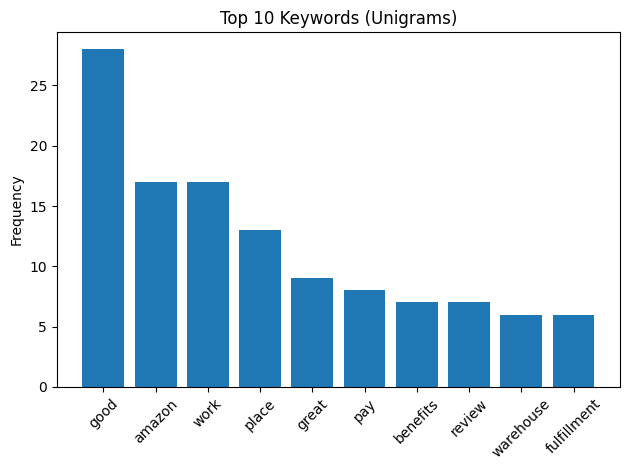

In [7]:
import matplotlib.pyplot as plt

most_common = word_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [8]:
stop_keywords = ['team','company', 'job', 'work']
filtered_words = [word for word in all_words if word not in stop_keywords]
filtered_counts = Counter(filtered_words)

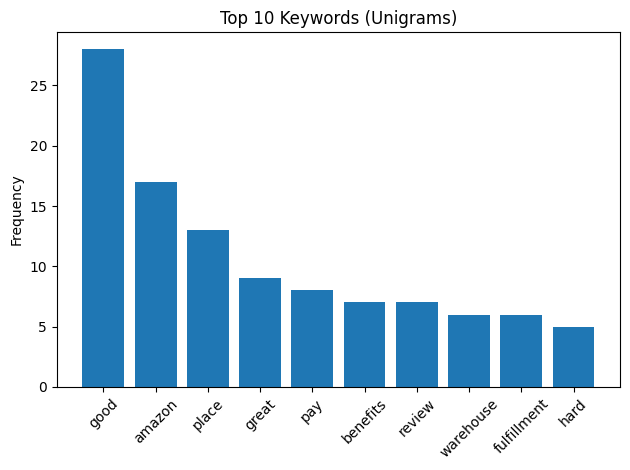

In [9]:
most_common = filtered_counts.most_common(10)
words, counts = zip(*most_common)

plt.bar(words, counts)
plt.title("Top 10 Keywords (Unigrams)")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [10]:
from nltk.util import ngrams

bigrams = list(ngrams(all_words, 2))
trigrams = list(ngrams(all_words, 3))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)


In [11]:
print(bigram_counts.most_common(3))

[(('place', 'work'), 7), (('good', 'place'), 6), (('fulfillment', 'center'), 4)]


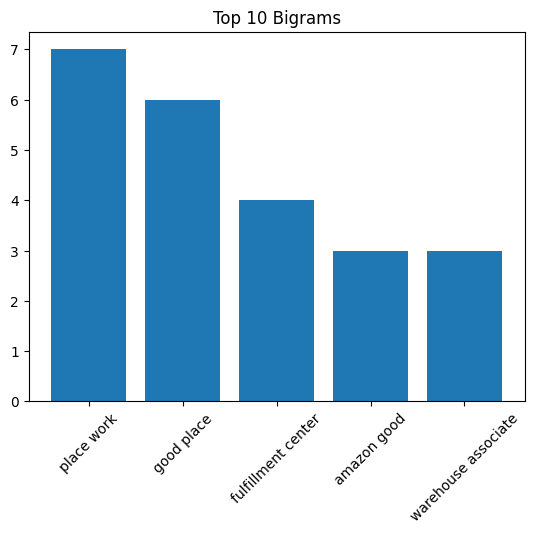

In [12]:
# For bigrams
common_bigrams = bigram_counts.most_common(5)
bg_labels = [' '.join(bg) for bg, count in common_bigrams]
bg_counts = [count for bg, count in common_bigrams]

plt.bar(bg_labels, bg_counts)
plt.title("Top 10 Bigrams")
plt.xticks(rotation=45)
plt.show()


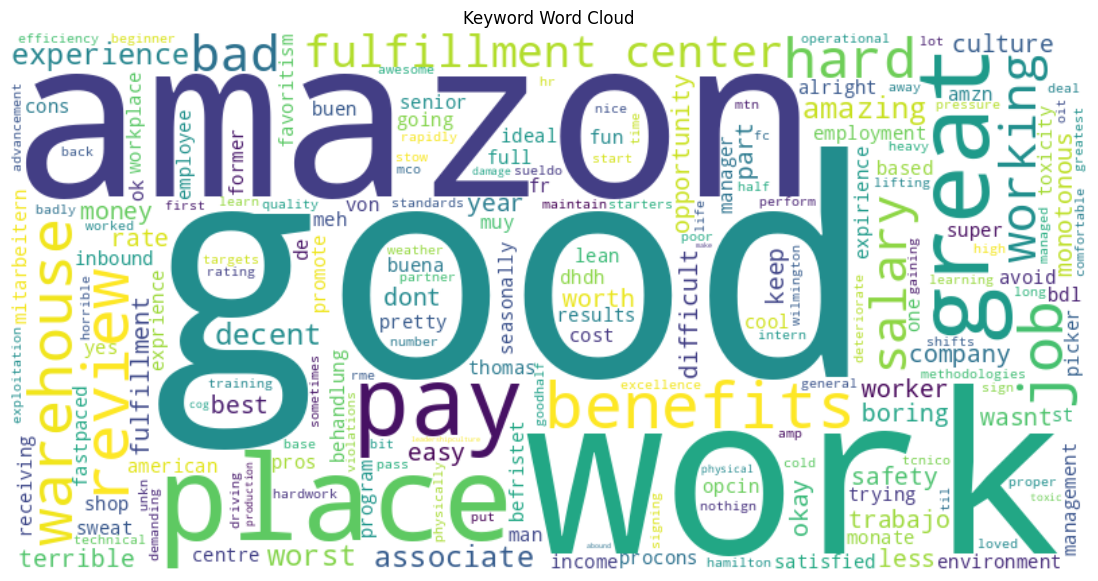

In [13]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Word Cloud")
plt.show()